## Plot KDE Max Eigenvalues density

In [275]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1" # Set GPU Index to use"

In [1]:
!ls hessian_value_pts/

cola-base-DA-gt.pt	 cola_gt_100.pt		   rte-base-M-FP-kd-trm.pt
cola-base-DA-pred.pt	 cola_m_100.pt		   rte-base-M-FP.pt
cola-base-DA-trm.pt	 cola_m_3_gt.pt		   rte-base-M-kd-pred.pt
cola-base-FP-gt.pt	 cola_m_3.pt		   rte-base-M-KD-trm.pt
cola-base-FP-kd-pred.pt  rte-base-30epoch.pt	   rte_base_m_L2.pt
cola-base-FP-kd-trm.pt	 rte-base-60epoch-gt.pt    rte-base-M.pt
cola-base-FT-30.pt	 rte-base-60epoch.pt	   rte-base-single-10.pt
cola-base-FT-60.pt	 rte-base-60epoch-trm.pt   rte_gt_100_2.pt.pt
cola-base-FT-90.pt	 rte-base-90.pt		   rte_gt_100.pt
cola-base-FT-GT-30.pt	 rte-base-DA-gt.pt	   rte_gt_3.pt
cola-base-FT-GT-3.pt	 rte-base-DA-kd-pred.pt    rte_m_100.pt
cola-base-FT-GT-60.pt	 rte-base-DA-trm.pt	   rte_m_3.pt
cola-base-FT-GT-90.pt	 rte-base-FT-30.pt	   rte_nomal_init.pt
cola-base-kd-pred.pt	 rte-base-FT-60.pt	   rte_ternary_init.pt
cola-base-kd-trm.pt	 rte-base-FT-GT-3.pt	   sst-2-base-FT-GT-30.pt
cola-base-l2l.pt	 rte-base-GT-30.pt	   sst-2-base-FT-GT-3.pt
cola-base-l2.pt		 rte-b

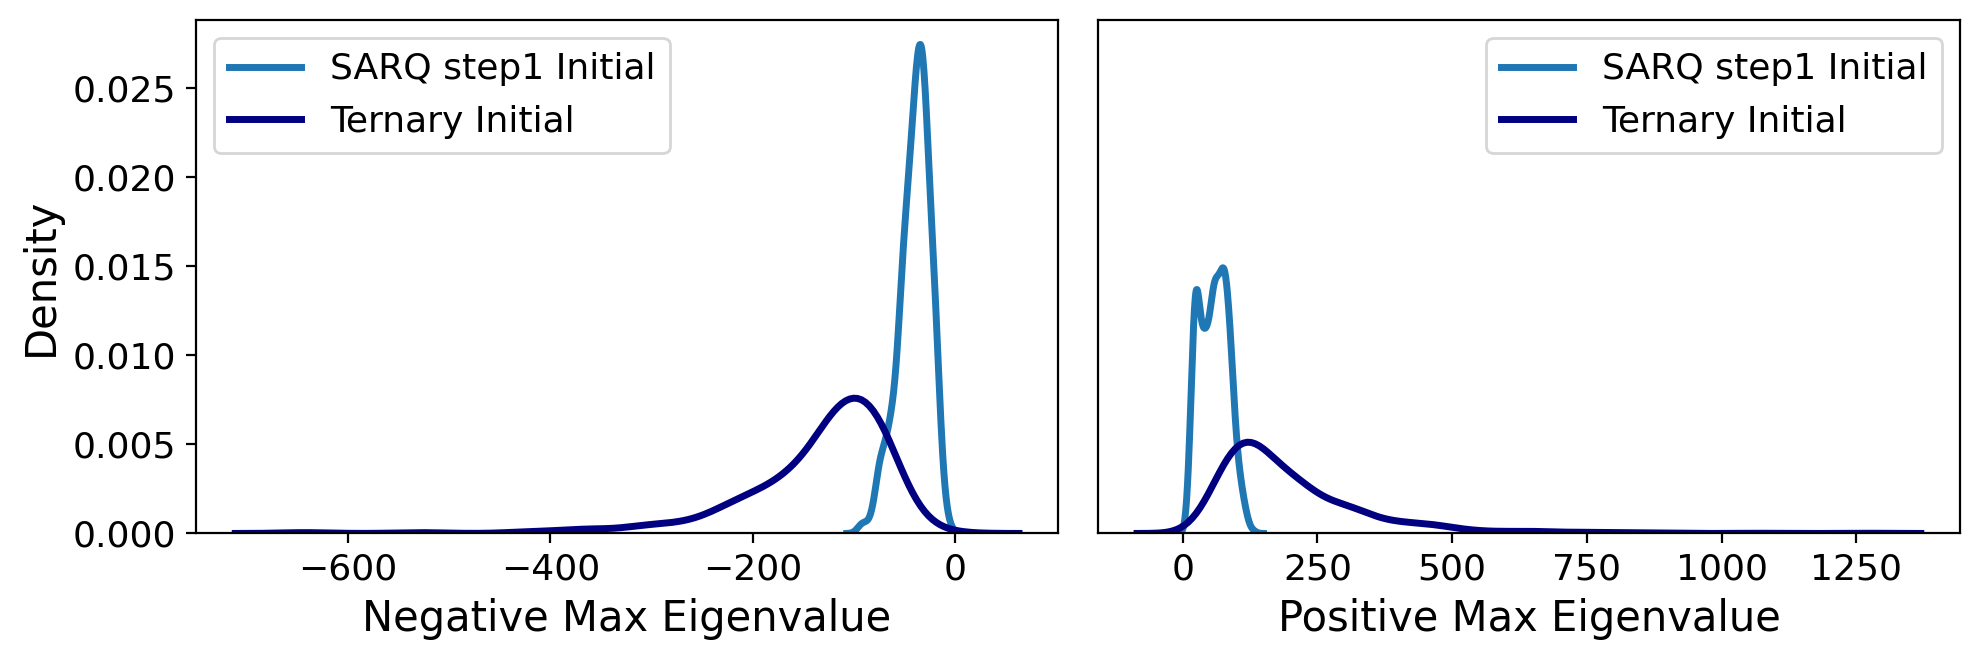

In [73]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

eigens_1 = torch.load("hessian_value_pts/cola_sarq_init.pt")
eigens_1_name = f"SARQ step1 Initial"
eigens_1_name_2 = f"SARQ step1 Initial"
eigens_2 =torch.load("hessian_value_pts/cola_ternary_init.pt")
eigens_2_name = f"Ternary Initial"
eigens_2_name_2 = f"Ternary Initial"
    
eigens_1_pos = []
eigens_1_neg = []
for eigen in eigens_1:
    if eigen > 0:
        eigens_1_pos.append(eigen)
    else:
        eigens_1_neg.append(eigen)
    
eigens_2_pos = []
eigens_2_neg = []
for eigen in eigens_2:
    if eigen > 0:
        eigens_2_pos.append(eigen)
    else:
        eigens_2_neg.append(eigen)
        
fs = 13
lw = 2.5

fig, axes = plt.subplots(1, 2, figsize=(10,3.4), dpi=200)

color_1 = "tab:blue"
color_2 = "navy"
color_3 = "darkblue"
color_4 = "tab:red"

# pos = [pos_1, pos_2]
# Plot
pos_1 = sns.kdeplot(eigens_1_pos, color=color_1, label=eigens_1_name, linewidth=lw, ax=axes[1])
pos_2 = sns.kdeplot(eigens_2_pos, color=color_2, label=eigens_2_name, linewidth=lw, ax=axes[1])
neg_1 = sns.kdeplot(eigens_1_neg, color=color_1, label=eigens_1_name_2, linewidth=lw, ax=axes[0])
neg_2 = sns.kdeplot(eigens_2_neg, color=color_2, label=eigens_2_name_2, linewidth=lw, ax=axes[0])

# Font Size

pos_1.get_yaxis().set_visible(False)
pos_1.tick_params(axis='x', labelsize=fs)
neg_1.tick_params(axis='x', labelsize=fs)
neg_1.tick_params(axis='y', labelsize=fs)
neg_1.set_ylabel(ylabel="Density", fontsize = fs+2)
pos_1.set_xlabel(xlabel="Positive Max Eigenvalue", fontsize = fs+2)
neg_1.set_xlabel(xlabel="Negative Max Eigenvalue", fontsize = fs+2)
axes[1].legend(fontsize = fs, loc=1)
axes[0].legend(fontsize = fs, loc=2)
axes[1].set_ylim(0, 0.025)
fig.tight_layout()

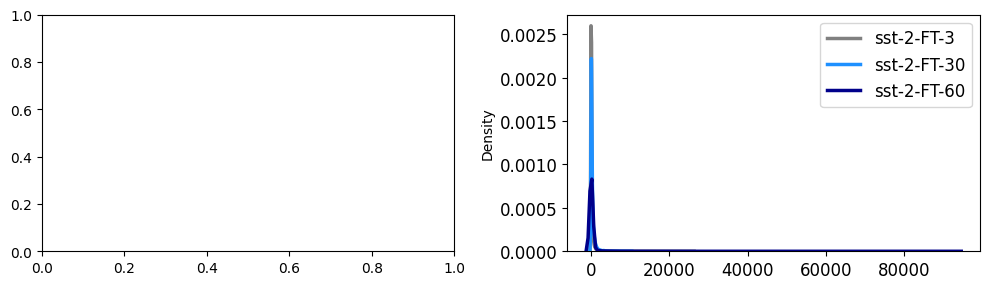

In [439]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# # STS-B
# if task == "sts-b":
#     ternary_eigens_init =torch.load("hessian_value_pts/sts-b_ternary_init.pt")
#     sarq_eigens_init = torch.load("hessian_value_pts/sts-b_sarq_init.pt")
#     ternary_eigens = torch.load("hessian_value_pts/sts-b_ternary_result.pt")
#     sarq_eigens = torch.load("hessian_value_pts/sts-b_sarq_result.pt")

# # RTE
# if task == "rte":
#     # ternary_eigens_init = torch.load("hessian_value_pts/rte_nomal_init.pt")
#     # sarq_eigens_init = torch.load("hessian_value_pts/rte_sarq_init.pt")
#     ternary_eigens = torch.load("hessian_value_pts/rte_base_long_M_L2.pt")
#     sarq_eigens = torch.load("hessian_value_pts/rte_base_m_L2.pt")

# # CoLA
# if task == "cola":
#     # sarq_eigens_init =torch.load("hessian_value_pts/cola_sarq_init.pt")
#     # ternary_eigens_init =torch.load("hessian_value_pts/cola_ternary_init.pt")
#     sarq_eigens =torch.load("hessian_value_pts/cola_m_3_gt.pt")
#     ternary_eigens =torch.load("hessian_value_pts/cola_gt_100.pt")

# # MRPC
# if task == "mrpc":
#     ternary_eigens_init =torch.load("hessian_value_pts/mrpc_ternary_init.pt")
#     sarq_eigens_init = torch.load("hessian_value_pts/mrpc_sarq_init.pt")
#     # ternary_eigens = torch.load("hessian_value_pts/mrpc_ternary_result.pt")
#     # sarq_eigens = torch.load("hessian_value_pts/mrpc_sarq_result.pt")

task_name="sst-2"
eigens_1 = torch.load(f"hessian_value_pts/{task_name}-base-FT-GT-3.pt")
eigens_1_name = f"{task_name}-FT-3"
eigens_2 =torch.load(f"hessian_value_pts/{task_name}-base-FT-GT-30.pt")
eigens_2_name = f"{task_name}-FT-30"
eigens_3 = torch.load(f"hessian_value_pts/{task_name}-base-FT-GT-60.pt")
eigens_3_name = f"{task_name}-FT-60"
eigens_4 = torch.load("hessian_value_pts/rte-base-DA-kd-pred.pt")
eigens_4_name = "RTE-pred-DA"

    
eigens_1_pos = []
eigens_1_neg = []
for eigen in eigens_1:
    if eigen > 0:
        eigens_1_pos.append(eigen)
    else:
        eigens_1_neg.append(eigen)
    
eigens_2_pos = []
eigens_2_neg = []
for eigen in eigens_2:
    if eigen > 0:
        eigens_2_pos.append(eigen)
    else:
        eigens_2_neg.append(eigen)
        
eigens_3_pos = []
eigens_3_neg = []
for eigen in eigens_3:
    if eigen > 0:
        eigens_3_pos.append(eigen)
    else:
        eigens_3_neg.append(eigen)
        
eigens_4_pos = []
eigens_4_neg = []
for eigen in eigens_3:
    if eigen > 0:
        eigens_4_pos.append(eigen)
    else:
        eigens_4_neg.append(eigen)
    
fs = 12
lw = 2.5

fig, axes = plt.subplots(1, 2, figsize=(10
                                        ,3), dpi=100)

color_1 = "gray"
color_2 = "dodgerblue"
color_3 = "darkblue"
color_4 = "tab:red"

sns.kdeplot(eigens_1_pos, color=color_1, label=eigens_1_name, linewidth=lw, ax=axes[1])
sns.kdeplot(eigens_2_pos, color=color_2, label=eigens_2_name, linewidth=lw, ax=axes[1])
sns.kdeplot(eigens_3_pos, color=color_3, label=eigens_3_name, linewidth=lw, ax=axes[1])
# sns.kdeplot(eigens_4_pos, color=color_4, label=eigens_4_name, linewidth=lw, ax=axes[1])
axes[1].legend(fontsize = fs, loc=1)
# axes[1].set_xlim(-1500,3000)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)



# sns.kdeplot(eigens_1_neg, color=color_1, label="CoLA-UT-QAT-50.48", linewidth=lw, ax=axes[0])
# sns.kdeplot(eigens_2_neg, color=color_2, label="CoLA-FP-QAT-58.04", linewidth=lw, ax=axes[0])#
# sns.kdeplot(eigens_3_neg, color=color_3, label=eigens_3_name, linewidth=lw, ax=axes[0])
# axes[0].set_xlim(-5000,4)
# sns.kdeplot(eigens_4_neg, color=color_4, label=eigens_4_name, linewidth=lw, ax=axes[0])
# axes[0].legend(fontsize = fs, loc=2)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# fig.tight_layout()
# fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=100)

# sns.kdeplot(eigens_4_pos, color="tab:red", label=eigens_3_name, linewidth=lw, ax=axes[1])
# sns.kdeplot(eigens_4_neg, color="tab:red", label=eigens_3_name, linewidth=lw, ax=axes[0])
# axes[1].legend(fontsize = fs, loc=1)

# plt.xticks(fontsize=fs)
# plt.yticks(fontsize=fs)
fig.tight_layout()

In [406]:
eigens_1_neg

[-139.03639221191406,
 -40.73690414428711,
 -1000.2684326171875,
 -239.0410919189453,
 -2089.7255859375,
 -697.4592895507812,
 -10.366840362548828,
 -133.50680541992188,
 -29.062274932861328,
 -5.397683143615723,
 -83.84814453125,
 -18858.34765625,
 -5172.5458984375,
 -215.14813232421875,
 -103.76891326904297,
 -9.877697944641113,
 -175.45765686035156,
 -972.9544677734375,
 -236.84707641601562,
 -172.3470001220703,
 -12.341241836547852,
 -388.423583984375,
 -232.64895629882812,
 -150.1134033203125,
 -9073.41015625,
 -636.5606079101562,
 -185.1335906982422,
 -16.79590606689453,
 -46.97588348388672,
 -36.689456939697266,
 -728.9228515625,
 -174.84487915039062,
 -153.38809204101562,
 -23.76842498779297,
 -91.643798828125,
 -380.34503173828125,
 -696.5909423828125,
 -173.55499267578125,
 -150.74977111816406,
 -66.32221221923828,
 -46.7902946472168,
 -225.85574340820312,
 -49.947017669677734,
 -31.949777603149414,
 -25.617088317871094,
 -155.50352478027344,
 -106.6253890991211,
 -294.708892

# Layerwise Hessian Analysis

In [188]:
!ls layer_hessian_results

cola					rte-0.05-7-KD-layer-eigens.csv
cola-0.01-42-eigens.csv			rte-0.05-7-KD-pred-eigens.csv
cola-0.01-52-eigens.csv			rte-0.05-8-KD-layer-eigens.csv
cola-0.01-62-eigens.csv			rte-0.05-8-KD-pred-eigens.csv
cola-0.01-eigens.csv			rte-0.05-9-KD-layer-eigens.csv
cola-0.05-10-KD-layer-large-eigens.csv	rte-0.05-9-KD-pred-eigens.csv
cola-0.05-10-KD-pred-large-eigens.csv	rte-0.05-eigens.csv
cola-0.05-1-KD-layer-large-eigens.csv	sst-2-0.01-10-KD-layer-eigens.csv
cola-0.05-1-KD-pred-large-eigens.csv	sst-2-0.01-10-KD-pred-eigens.csv
cola-0.05-2-KD-layer-large-eigens.csv	sst-2-0.01-1-KD-layer-eigens.csv
cola-0.05-2-KD-pred-large-eigens.csv	sst-2-0.01-1-KD-pred-eigens.csv
cola-0.05-3-KD-layer-large-eigens.csv	sst-2-0.01-2-KD-layer-eigens.csv
cola-0.05-3-KD-pred-large-eigens.csv	sst-2-0.01-2-KD-pred-eigens.csv
cola-0.05-4-KD-layer-large-eigens.csv	sst-2-0.01-3-KD-layer-eigens.csv
cola-0.05-4-KD-pred-large-eigens.csv	sst-2-0.01-3-KD-pred-eigens.csv
cola-0.05-5-KD-layer-large-eigens.csv	sst-2-0.01

In [232]:
data = pd.read_csv('layer_hessian_results/rte-0.05-2-KD-layer-large-eigens.csv')
data

Empty DataFrame
Columns: [block, iters, max_eigenvalue]
Index: []

In [223]:
import csv
import pandas as pd

layer_num=24

lw_eigen_dict = dict()
for l in range(layer_num):
    lw_eigen_dict[f"{l}th"] = []

names = ["block", "iters", "max_eigenvalue"]
task_name = "rte"
data_percentage = 0.05
seed = 1
kd_loss_type = "layer"

for seed in range(10):
    seed = seed + 1
    csv_path = os.path.join("layer_hessian_results", f"{task_name}-{data_percentage}-{seed}-KD-{kd_loss_type}-large-eigens.csv")
    data = pd.read_csv(csv_path, names=names)

    for i in range(layer_num):
        lw_eigen_dict[f"{i}th"].append(float(data["max_eigenvalue"][i+1]))
box_list = []
for l in range(layer_num):
    box_list.append(lw_eigen_dict[f"{l}th"])

KeyError: 1

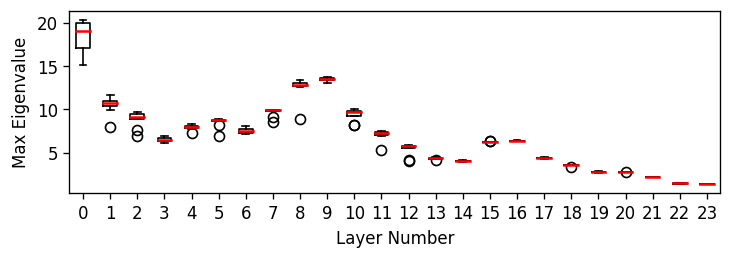

In [222]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(range(layer_num))
fig, ax = plt.subplots(figsize=(7,2), dpi=120)
bplot = ax.boxplot(box_list, labels=labels, medianprops=dict(color='red', linewidth=1.5))
ax.set_xlabel("Layer Number")
ax.set_ylabel("Max Eigenvalue")
plt.show()


## Gradient Norm Graph


(0.03162277660168379, 100)

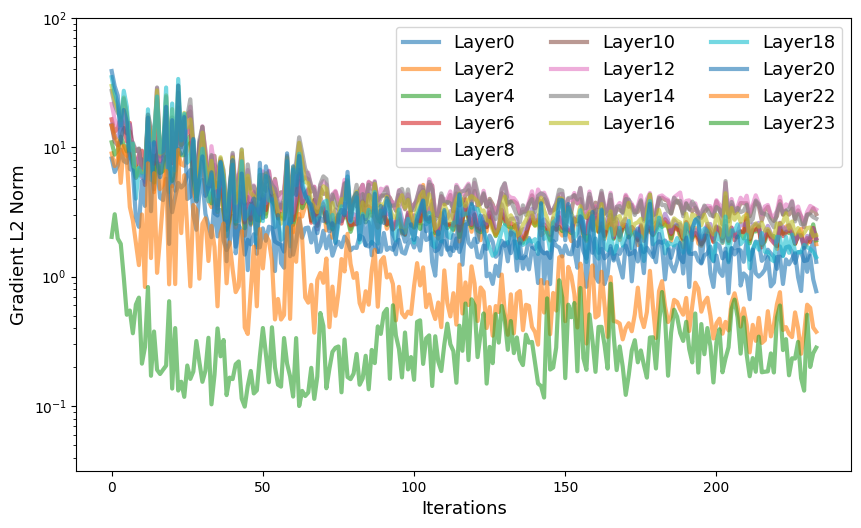

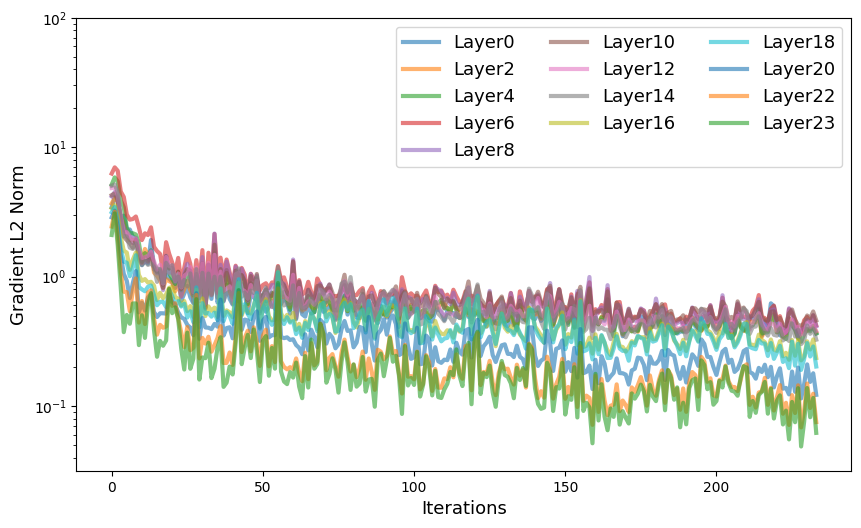

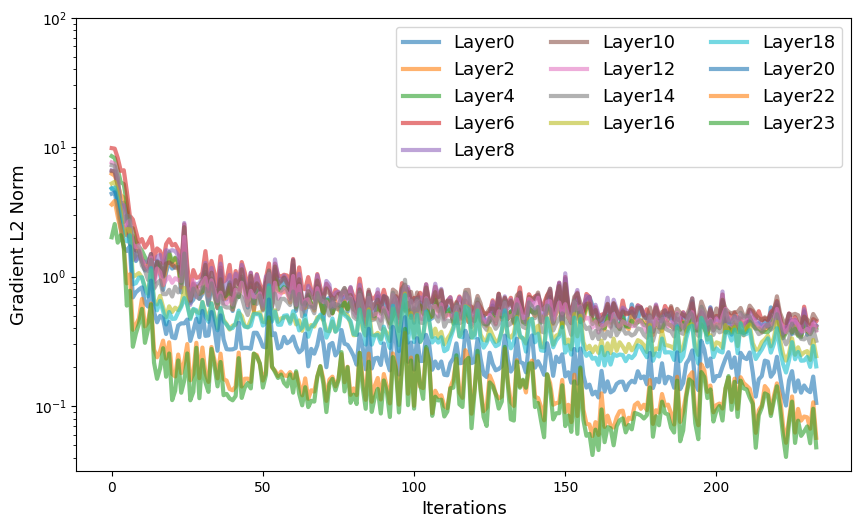

In [63]:
ternary_grad = torch.load("rte_large_ternary_grad_dict.pt")
grad_2SB = torch.load("rte_large_2SB_grad_dict.pt")
grad_1SB = torch.load("rte_large_1SB_grad_dict.pt.pt")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
layer_list = list(range(0, 24, 2))
# layer_list = list(range(0, 24))
layer_list.append(23)
layer = layer_list
# earlier_layer = layer_list[0:3]
# middle_layer = layer_list[10:13]
# deeper_layer = layer_list[20:]
# layer = deeper_layer
# layer = earlier_layer + middle_layer + deeper_layer

type="value"
step_num = len(ternary_grad[f"ffn_2_L{0}"])
for l in layer:
    ax.plot(range(step_num), ternary_grad[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.ylim((pow(10,-1.5),pow(10,2)))
plt.legend(fontsize=13, loc=1, ncol=3)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_1SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=3)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_2SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=3)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)

(0.03162277660168379, 100)

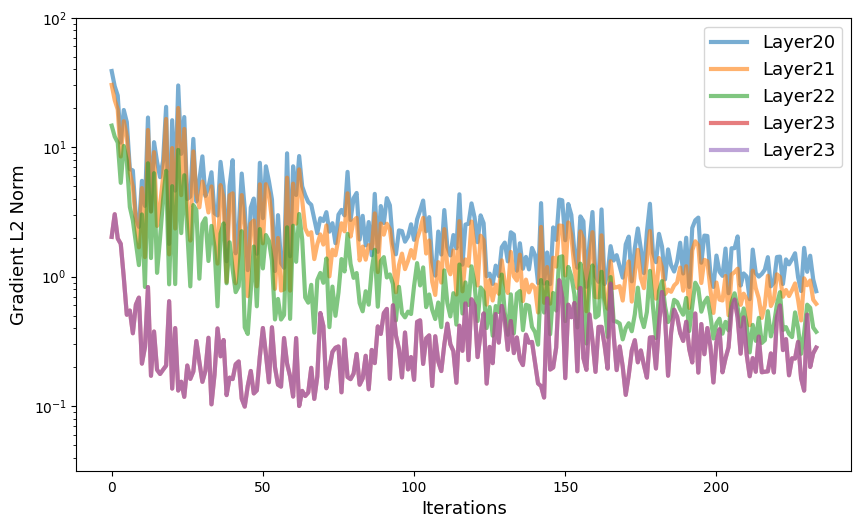

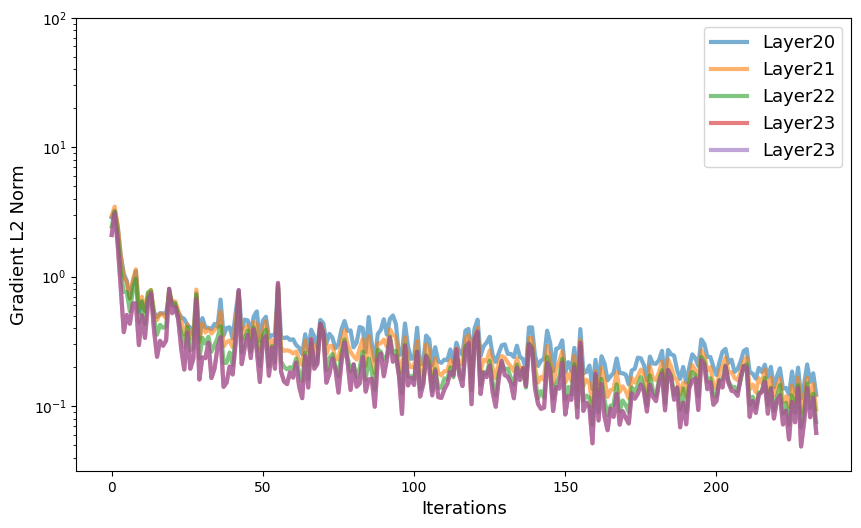

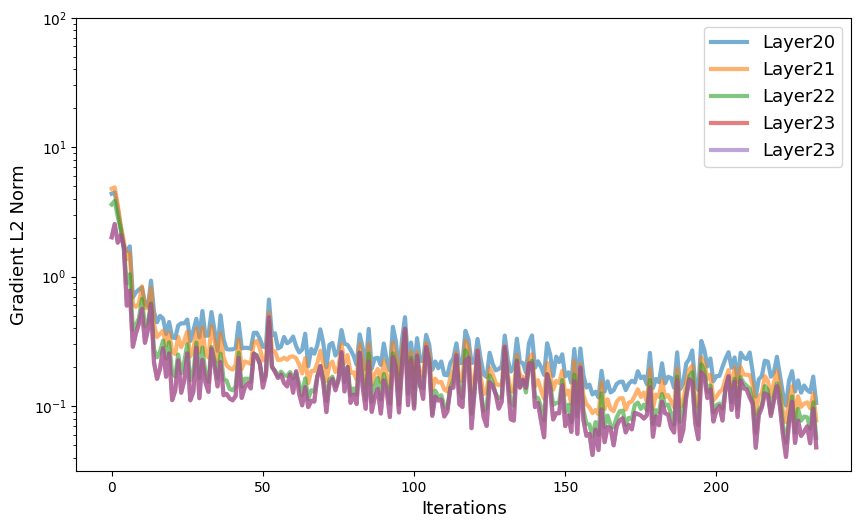

In [64]:
ternary_grad = torch.load("rte_large_ternary_grad_dict.pt")
grad_2SB = torch.load("rte_large_2SB_grad_dict.pt")
grad_1SB = torch.load("rte_large_1SB_grad_dict.pt.pt")

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
# layer_list = list(range(0, 24, 2))
layer_list = list(range(0, 24))
layer_list.append(23)
# layer = layer_list
# earlier_layer = layer_list[0:3]
# middle_layer = layer_list[10:13]
deeper_layer = layer_list[20:]
layer = deeper_layer
# layer = earlier_layer + middle_layer + deeper_layer

step_num = len(ternary_grad[f"ffn_2_L{0}"])
for l in layer:
    ax.plot(range(step_num), ternary_grad[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.ylim((pow(10,-1.5),pow(10,2)))
plt.legend(fontsize=13, loc=1, ncol=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_1SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=1)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)
fig, ax = plt.subplots(1, 1, figsize=(10, 6), dpi=100)
for l in layer:
    ax.plot(range(step_num), grad_2SB[f"{type}_L{l}"], label=f"Layer{l}", linewidth=3.0, alpha=0.6)
plt.yscale("log")
plt.ylabel("Gradient L2 Norm", fontsize=13)
plt.xlabel("Iterations", fontsize=13)
plt.legend(fontsize=13, loc=1, ncol=1)
plt.ylim((pow(10,-1.5),pow(10,2)))
# plt.legend(fontsize=15)